# 워드크라우드

In [ ]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
#한글 폰트 설치 런타임 다시시작

In [ ]:
!pip install konlpy > /dev/null

In [ ]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving gift.txt to gift.txt


In [ ]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving heart.jpg to heart.jpg



# 한글 텍스트 전처리

In [ ]:
with open(textfile) as fp:
    text = fp.read()

In [ ]:
from konlpy.tag import Okt
okt = Okt()


In [ ]:
tokens = okt.nouns(text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [ ]:
import re
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)
    if item:
        new_tokens.append(item)


In [ ]:
#한글폰트 사용
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

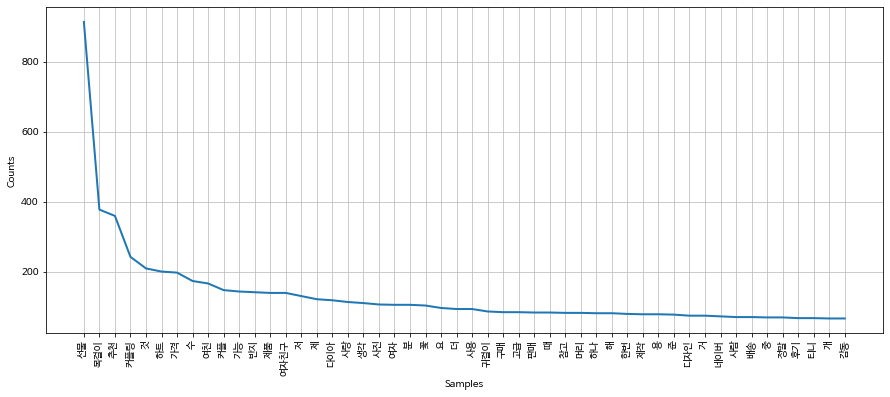

In [ ]:
gift = nltk.Text(new_tokens, name ='여친선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [ ]:
stoptext = """선물 추천 것 가격 수 기능 제품 저 제 생각 여자 여자친구 사용 요 더 꽃
구매 고급 판매 때 참고 머리 하나 해 한번 제작 용 준 디자인 거 네이버 사람 배송 중 후기 감동 여친 커플 가능 사랑 인기 상품 직접 브랜드 선택 곳 모양 마감 요즘 마음 노늘
 가지 남녀 그냥 위 페이 마음 부담 신지 오늘 남자 협찬 전 핸드 의미 도움 색상 아래 포장 처 조금 하루 정도 
"""

#찍어보고 계속 스탑워드 추가 하여 정제함

In [ ]:
stop_words =  stoptext.split()
#stop_words

In [ ]:
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['반지', '목걸이', '가디건', '모자', '몇개', '투척', '클래식', '커플룩', '버핏', '빅사']

# 워드 크라우드 그리기

In [ ]:
from wordcloud import WordCloud
from PIL import Image


In [ ]:
data = gift.vocab().most_common(300)
gift.vocab().most_common(300)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path=path, relative_scaling=0.2, background_color='white').generate_from_frequencies(dict(data))


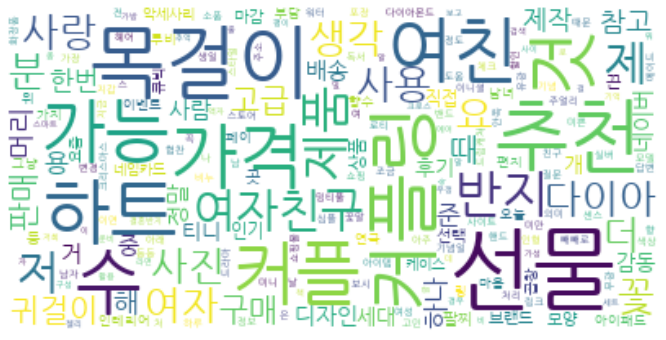

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 하트에 표시하기

In [ ]:
mask = np.array(Image.open(maskfile))
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [ ]:
 
wc = WordCloud(font_path=path, relative_scaling=0.2, background_color='white', mask=mask, ).generate_from_frequencies(dict(data))
 
default_color = wc.to_array

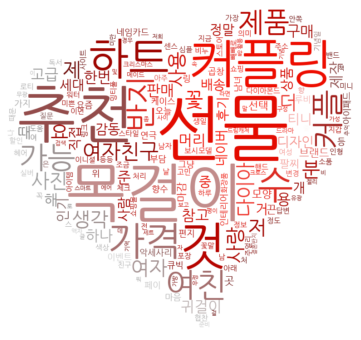

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()